## Иследования рынка видеоигр

### Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Исследование будет проводится придерживаясь следующего плана: 1. Откыть файл и изучить общую информацию  2. Подготовка данных  3. Иследовательский анализ данных  4. Составления портрета пользователя  5. Проверка гипотез  6. Общий вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import numpy as np
from scipy import stats as st 
import seaborn as sns
import scipy as sp 
import scipy.stats

In [2]:
# прочитаем данные
data = pd.read_csv('/datasets/games.csv')
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


 ### Опишим полученные данные
 ### Перед нами данные о играх и игровых платформам до 2016 года. 
#### Name — название игры
#### Platform — платформа
#### Year_of_Release — год выпуска
#### Genre — жанр игры
#### NA_sales — продажи в Северной Америке (миллионы долларов)
#### EU_sales — продажи в Европе (миллионы долларов)
#### JP_sales — продажи в Японии (миллионы долларов)
#### Other_sales — продажи в других странах (миллионы долларов)
#### Critic_Score — оценка критиков (максимум 100)
#### User_Score — оценка пользователей (максимум 10)
#### Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 2. Подготовка данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### В таблице данных имеется   16715 строк и 11 столбцов, 6 из них имеют формат float64 и 5 object. Пропуски наличествуют во всех столбцах за исключением данных о продажах по регионам. В названиях столбцов истользуется различный регистр букв. В предобработке данных приведем названия столбцов к нижнему регистру, Строки с пропусками с столбцах название, год и жанр - пропусков достаточно малое количество, поэтому строки с пропусками можно удалить это не окажет значительного влияния на результат. Пропуски в столбце рейтинг заменим на значение  - отсутствует рейтинг.  В столбцах оценка критиков и пользователей заменим пропуски основываясь на оценках игр на других платформах. Формат  столбца год заменим на int. 

### Заменим названия столбцов (приведем к нижнему регистру)

In [4]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [5]:
# проверим количечтво пропусков
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
# проверим наличие дубликатов
data.duplicated().sum()

0

### в таблице наблюдаем пропуски в столбцах название игры, год выпуска, жанр, оценк критиков и пользователей и рейтинг. Вначале обратим внимание на название, год и жанр - пропусков достаточно малое количество, поэтому строки с пропусками можно удалить.

In [7]:
# удалим строки с пропущенным названием игры
data.dropna( subset = ['name','year_of_release'], inplace = True)
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

### заменим тип данных в столбце год

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int')

### Также в столбце оценка пользователей присутствует обозначене абривиатура tbd означающее "будет сообщено дополнительно". Таких значение присутствует значительное количество 2376. Просто удалить их нерационально. Возможно принять данные значения за пропуск. Для этого приведем значение tbd к численому значению, а затем обработаем на равне с другими пропусками.

In [9]:
tbd = data.query('user_score == "tbd"')
tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [10]:
# заменим 'tbd' на значение численное 'NaN'
data['user_score'] = pd.to_numeric(data['user_score'], errors ='coerce') 

### посмотрим распределение значений в столбцах оценка критиков и пользователей 

In [11]:
data['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [12]:
data['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [13]:
# заменим пропуски основываясь на оценках игр на других платформах
data['critic_score'].fillna(data.groupby('name')['critic_score'].transform('median'), inplace=True) 
data['user_score'].fillna(data.groupby('name')['user_score'].transform('median'), inplace=True) 
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7522
user_score         7920
rating             6676
dtype: int64

### Количество пропусков столбцах оценка критиков и пользователей сократилось в восемь и шесть раз соответственно. Количество оставшихся пропусков уже менее значительно, заменим на медианные

In [14]:
# заменим отсутствующие значения на медианные
data['critic_score'] = data['critic_score'].fillna(data['critic_score'].median())
data['user_score'] = data['user_score'].fillna(data['user_score'].median())

### Пропущенные значения в столбце рейтинг заменим на значение - нет рейтинга

In [15]:
# заменим отсутствующие значения на нет рейтинга
data['rating'] = data['rating'].fillna('no_rating')

In [16]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [17]:
# добавим столбец с суммарным количеством продаж по всем регионам 
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.425,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.300,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,7.425,no_rating,31.38


## Шаг 3. Проведитем исследовательский анализ данных







### Посмотрим сколько игр выпускалось в разные годы

In [18]:
data_year_sum = data.pivot_table( index = ['year_of_release'], values = ['name'],aggfunc = ['count'])
data_year_sum

,count
,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16


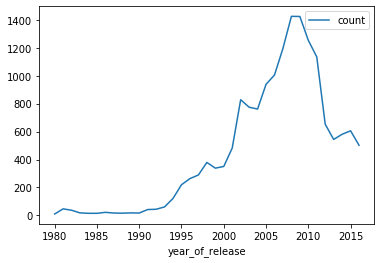

In [19]:
# построим график
sns.lineplot(data = data_year_sum)

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Расмотрим за какой характерный срок появляются новые и исчезают старые платформы?

In [20]:
# выберем игровые платформы с наибольшими сумарными продажами
data_platform = data.pivot_table(index = ['platform'], values = ['sum_sales'], aggfunc =['count'])
data_platform.columns = ['count']
data_platform_top10 = data_platform.sort_values(by = ['count'], ascending = False).head(10)
data_platform_top10                                                                                                        

,count
platform,
PS2,2127
DS,2121
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957
GBA,811


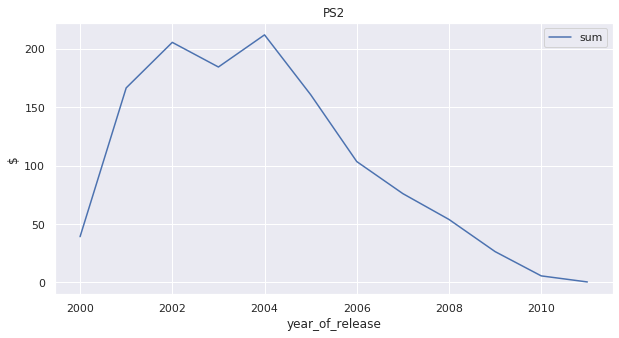

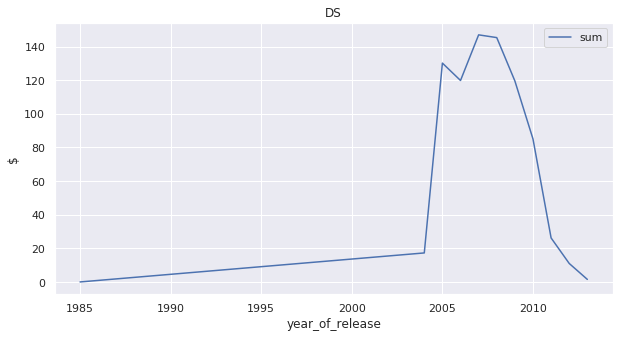

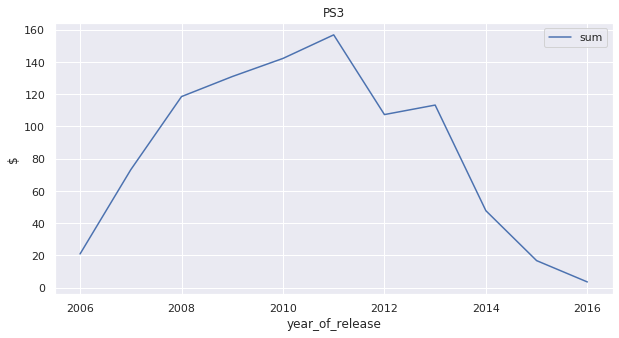

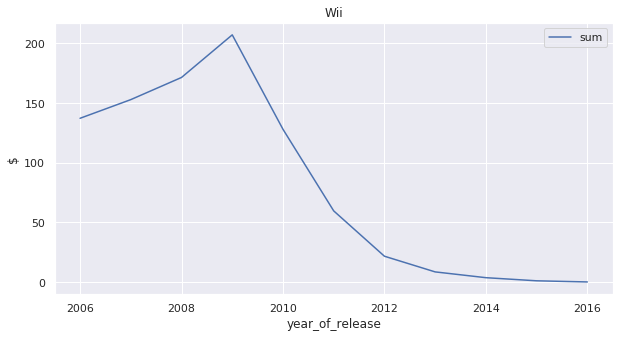

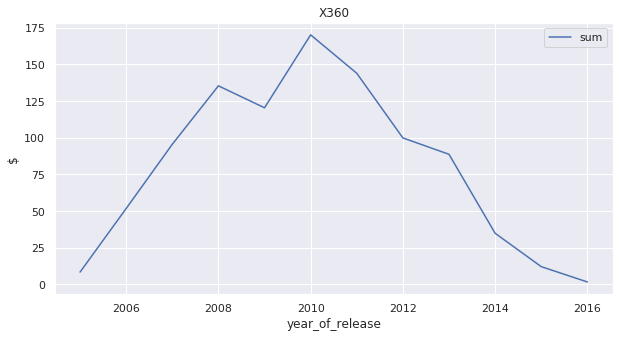

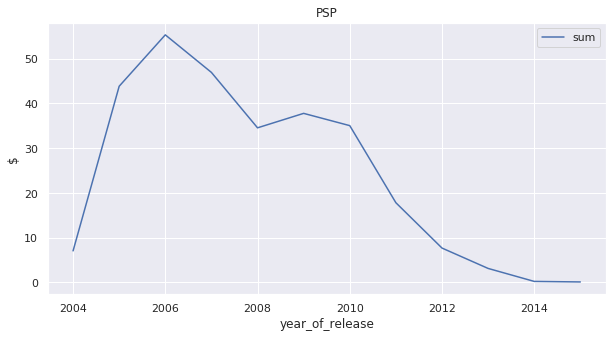

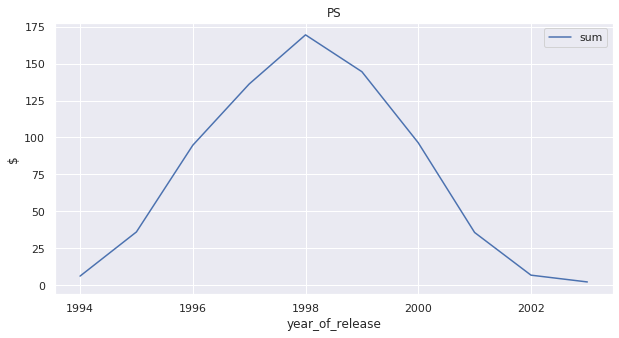

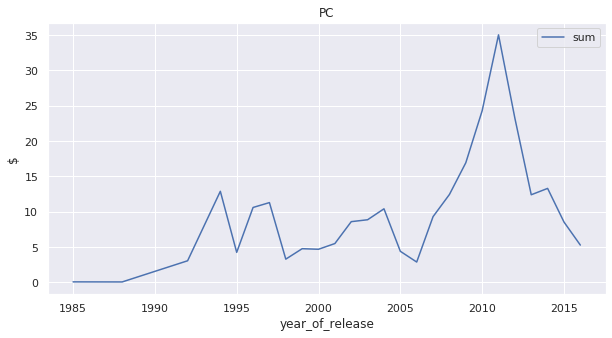

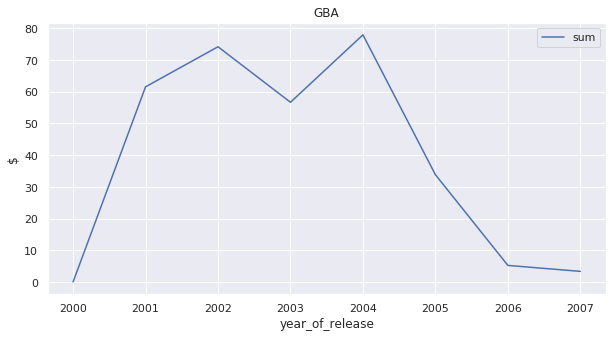

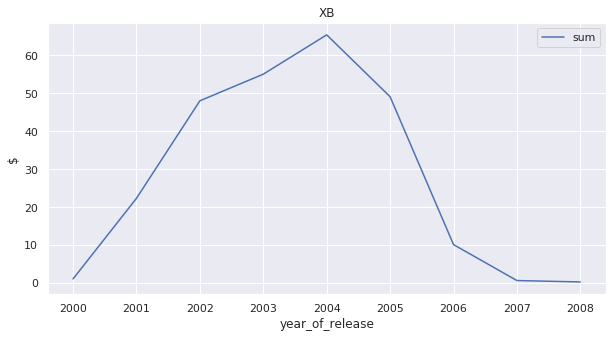

In [21]:
# построим распределение по годам 
r = data_platform_top10.index
sns.set(rc={'figure.figsize':(10,5)})
for plat in r:
    e = data.query('platform in @plat')
    data_platform_year = e.pivot_table(index = ['year_of_release'], values = ['sum_sales'],  aggfunc =['sum'])
    sns.lineplot(data = data_platform_year)
    plt.title(plat)
    plt.ylabel('$')
    plt.show()

### на основании расмотренных данных можно сделать вывод, что характерный срок за который появляется и исчезает игоровая платформа составляет около 10 лет. Расчитаем более точный показатель

In [22]:
# расчет среднего времени жизн и платформы
data_year = data.pivot_table(index = ['platform','year_of_release']).reset_index()
data_year1 = data_year.pivot_table(index = ['platform'], values = ['year_of_release'], aggfunc = ['count']).reset_index()
data_year1.columns  = ['platform','year']
print('Средний срок жизни платформы', data_year1['year'].mean(), 'лет')

Средний срок жизни платформы 7.67741935483871 лет


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

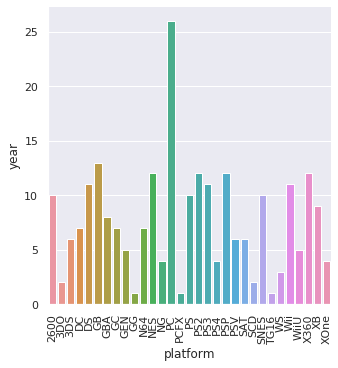

In [23]:
sns.catplot(data = data_year1, x='platform', y='year', kind='bar')
plt.xticks(rotation=90)

### на основании расчета получили средний срок за который появляется и исчезает игоровая платформа составляет около 7.67 лет

### Возьмем для анализа данные с 2012 года, т.к. в период с 1980 по 2008 годы наблюдался ежегодный рост количества проданных игр, а в период с 2009 по 2011 годы наблюдался резкий спад. С 2012 года по 2016 наблюдается относительно равномерное распределение количества продаж игр по годам без резких изменений показателей 

### Не будем учитывайте в работе данные за предыдущие годы.

In [24]:
# создание актуальной базы данных
data_actual = data.query('year_of_release >= 2012')
data_actual.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.200,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.100,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.425,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,71.0,7.425,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.300,M,13.79


### Рассмотрим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [25]:
data_lider_sales = data_actual.pivot_table(index = ['platform', 'year_of_release'], values = ['sum_sales'], 
                                           aggfunc = ['sum']).reset_index()
data_lider_sales.columns = ['platform', 'year_of_release','sum_sales']
data_lider_sales.head(5)

,platform,year_of_release,sum_sales
0,3DS,2012,51.36
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,3DS,2016,15.14


<function matplotlib.pyplot.show(*args, **kw)>

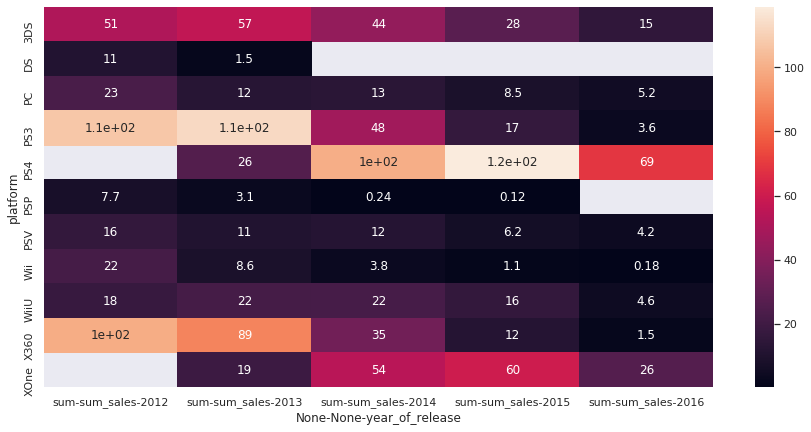

In [26]:
# построим тепловую карту
data_l_sales = data_actual.pivot_table(index = ['platform'], columns=['year_of_release'], values = ['sum_sales'], 
                                       aggfunc = ['sum'])
sns.set(rc={'figure.figsize':(15,7)})
sns.heatmap(data_l_sales, annot=True)
plt.show

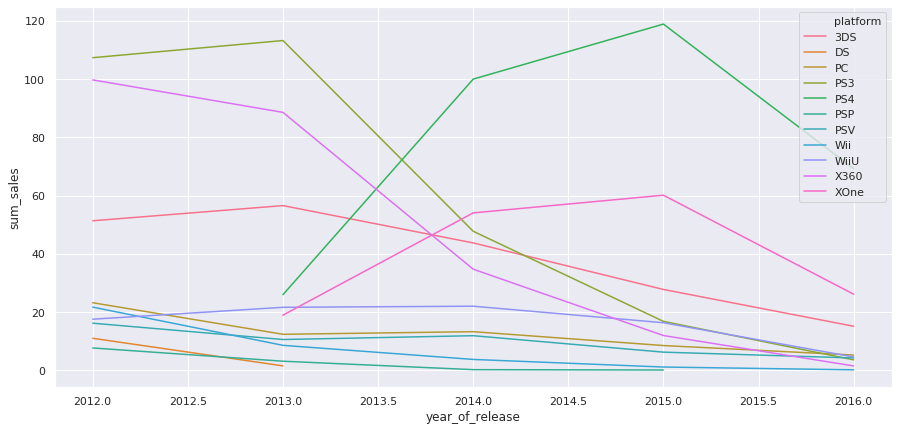

In [27]:
# Построим графики распределения выручки по годам
sns.lineplot(data = data_lider_sales, x = 'year_of_release',  y='sum_sales', hue = 'platform')

### рассматривая показатели продаж за период с 2012 по 2016 годы можно заметить, что выбор игровых платформ ограничен  11 видами. При этом в основновном происходит спад объемов продаж за исключением PS4 и XOne  которые без учета 2016 года (возможно не полные данные) показывают положительную динамику продаж.

### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Расмотрим велика ли разница в продажах, а также в средних продажах на разных платформах? 

<function matplotlib.pyplot.show(*args, **kw)>

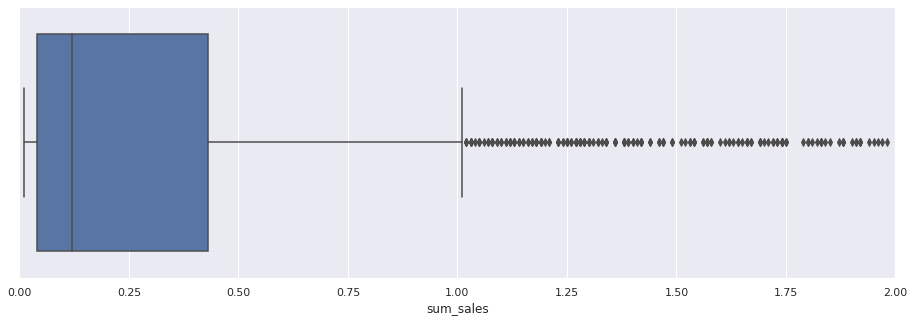

In [28]:
#sns.boxplot(data=data_actual, x='sum_sales', y='name')
sns.set(rc={'figure.figsize':(15.7,5)})
plt.xlim(0, 2)
sns.boxplot(data=data_actual, x='sum_sales')
plt.show

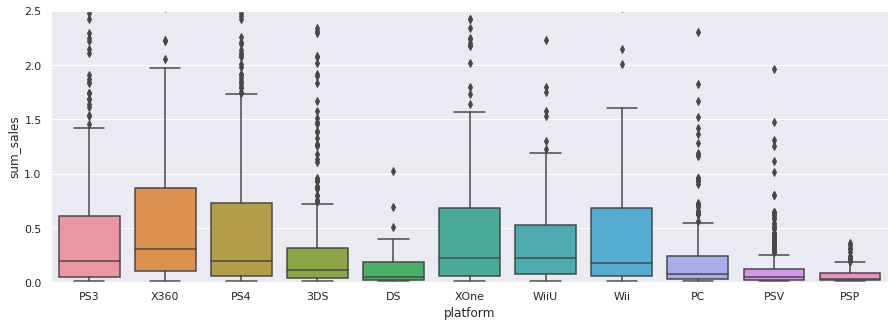

In [29]:
sns.set(rc={'figure.figsize':(15,5)})
plt.ylim(0, 2.5)
sns.boxplot(data=data_actual, x='platform', y='sum_sales')

plt.show()

### Основная масса продаж приходится на диапазон от 0,01 до 1,01 млн. долларов, средний показатель 0,5 млн. долларов. Значения свыше 1,01 можно отнести к редким или выбросам и исключить.

### В целом при различии границ диапазонов расматриваемых диаграмм размаха можно отметить схожие показатели среденого значения 0,5 и 0,49.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [30]:
data_ps4 = data_actual.query('platform == "PS4"')
data_ps4.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,7.425,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.300,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.300,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,71.0,7.425,no_rating,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.700,M,7.66


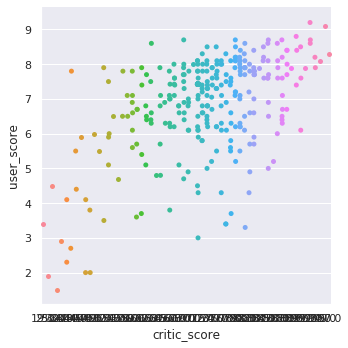

In [31]:
sns.catplot(data = data_ps4, x = 'critic_score', y = 'user_score', c = 'sum_sales')

### По диаграмме рассеивания можно заметить, что с увеличением оценки увеличивается уровень продаж. Однако по рассеяванию можно предположить, что в большей степени на продажи влияют оценки критиков, а значимость оценки пользователей ниже. Проверим это предположание посчитав коэфициент корреляции.

In [32]:
# расчет корреляции в зависимости от оценки критиков
data_ps4['sum_sales'].corr(data_ps4['critic_score'])

0.33354713316943707

In [33]:
# расчет корреляции в зависимости от оценки пользователей
data_ps4['sum_sales'].corr(data_ps4['user_score'])

-0.042144482082911335

### По расчитаным коэфициентам корреляции видно, что прослеживается зависимость уровня продаж от оценки игр критиками, а влияние оценок пользователей кране мало и имеет отрицательный характер. Такой характер взаимосвязи показателей связан вероятно с тем, что критики более объективно проводят оценку игр, а пользователи зачастую выставляют оценку в случае негативного восприятия продукта.

### Соотнесем выводы с продажами игр на других платформах.


In [34]:
for plat in data_actual['platform'].unique():
    data_p = data_actual.query('platform in @plat')
    print('платформа', plat)
    print('корреляции в зависимости от оценки критиков', data_p['sum_sales'].corr(data_p['critic_score']))
    print('корреляции в зависимости от оценки пользователей', data_p['sum_sales'].corr(data_p['user_score']))
    print()

платформа PS3
корреляции в зависимости от оценки критиков 0.2966425384666122
корреляции в зависимости от оценки пользователей -0.05491772925435241

платформа X360
корреляции в зависимости от оценки критиков 0.3031152947623727
корреляции в зависимости от оценки пользователей -0.013554587642291019

платформа PS4
корреляции в зависимости от оценки критиков 0.33354713316943707
корреляции в зависимости от оценки пользователей -0.042144482082911335

платформа 3DS
корреляции в зависимости от оценки критиков 0.1548429208270979
корреляции в зависимости от оценки пользователей 0.09484674499686392

платформа DS
корреляции в зависимости от оценки критиков 0.0895098572195069
корреляции в зависимости от оценки пользователей 0.10271002179517172

платформа XOne
корреляции в зависимости от оценки критиков 0.32769239388342697
корреляции в зависимости от оценки пользователей -0.09515975555974826

платформа WiiU
корреляции в зависимости от оценки критиков 0.2964816931793438
корреляции в зависимости от оце

### Рассматривая  коэффициенты корреляции других платформ можно заметить, что в основном распределение показателей имеют схожий характенр с платформой PS4 за исключением WiiU и DS имеющих обратное распределение.

### Посмотрим на общее распределение игр по жанрам. Отметиим, что можно сказать о самых прибыльных жанрах и выделяются ли жанры с высокими и низкими продажами?

In [35]:
# получим таблицы распределения по жанрам
data_ganr = data_actual.pivot_table(index = ['genre'], values = ['sum_sales'], aggfunc = ['count', 'sum']).reset_index()
data_ganr.columns = ['genre','count_game', 'sum_sales']
data_ganr.sort_values(by = 'sum_sales', ascending = False)

,genre,count_game,sum_sales
0,Action,1031,441.12
8,Shooter,235,304.73
7,Role-Playing,370,192.80
10,Sports,268,181.07
3,Misc,192,85.04
4,Platform,85,61.00
6,Racing,115,53.50
2,Fighting,109,44.49
9,Simulation,80,35.12
1,Adventure,302,29.43


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

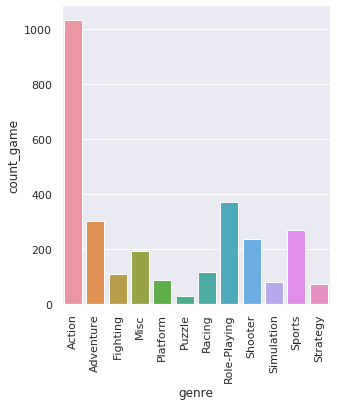

In [36]:
# расспределенике количества продаж от женра игры
sns.catplot(data=data_ganr, x='genre', y='count_game', kind='bar')
plt.xticks(rotation=90)

In [37]:
data_ganr.sort_values(by = 'count_game', ascending = False)

,genre,count_game,sum_sales
0,Action,1031,441.12
7,Role-Playing,370,192.80
1,Adventure,302,29.43
10,Sports,268,181.07
8,Shooter,235,304.73
3,Misc,192,85.04
6,Racing,115,53.50
2,Fighting,109,44.49
4,Platform,85,61.00
9,Simulation,80,35.12


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

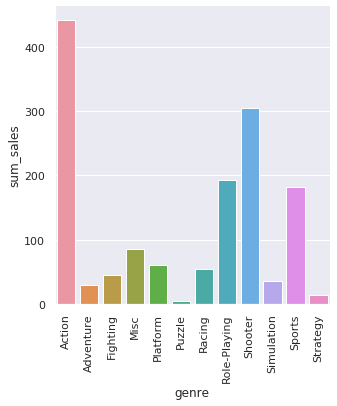

In [38]:
# расспределенике выручки продаж от женра игры
sns.catplot(data=data_ganr, x='genre', y='sum_sales', kind='bar')
plt.xticks(rotation=90)

### По распределению игр по жанрам можно заметить, что наиболее прибыльные жанры это Action и Shooter, прибыль 441,12 и 304,73 соответствено, а наименее прибыльные это игры основанные на спокойном сюжете такие как Puzzle, Strategy. При этом по количеству продаж показатели не совподают с суммой продаж. Так на третей позиции находится жанр Adventure, показатель продаж только 29.43. На этом замечании можно сделать вывод, что пользователям нравятся игры с более активным сюжетом, но при этом глобальная выручка от продаж зависит не только от объемов продаж, но и от стоимости конкретных игр. 

### Шаг 4. Составим портрет пользователя каждого региона




### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). 

Выбор пользователей Северной Америки
   platform     sum
9      X360  140.05
4       PS4  108.74
3       PS3  103.38
10     XOne   93.12
0       3DS   55.31


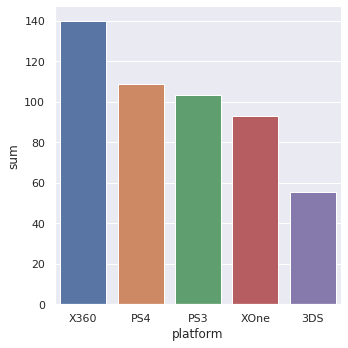


Выбор пользователей Европы
   platform     sum
4       PS4  141.09
3       PS3  106.86
9      X360   74.52
10     XOne   51.59
0       3DS   42.64


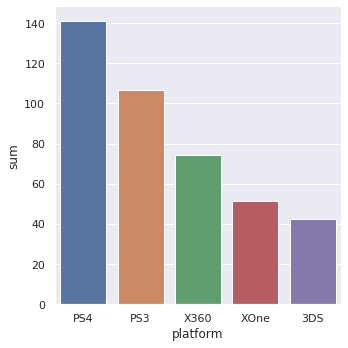


Выбор пользователей Японии
  platform    sum
0      3DS  87.79
3      PS3  35.29
6      PSV  21.04
4      PS4  15.96
8     WiiU  13.01


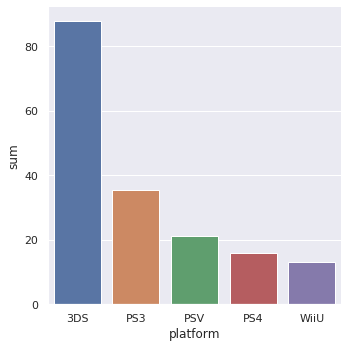

In [39]:
# получим тор5 платформ по регионам
regions = ['na_sales','eu_sales', 'jp_sales']
country = ['Северной Америки', 'Европы', 'Японии']
i = 0
for reg in regions:
    try:
        data_region = data_actual.pivot_table(index = ['platform'], values = [reg], aggfunc = ['sum']).reset_index()
        #print(data_region)
        data_region.columns = ['platform','sum']
        #print(data_region)
        print('Выбор пользователей', country[i])
        y = data_region.sort_values(by = 'sum', ascending = False).head(5)
        print(y)
        sns.catplot(data=y, x='platform', y='sum', kind='bar')
        plt.show()
        i += 1
        print()
    except:
        print('проверяй не получилось')


### По полученым данным видно, что выбор игровых платформ у пользователей Северной Америки и Европы совподает по наименованию платформ, однако в рейтинге продаж занимают различные позиции. Так лидер Северо Американского рынка Х360 с объемом продаж 140,05 в Европе занимает лишь третью позицию с суммой 74,52 и обратная ситуация с лидером Европы PS4 - 141.09 в Северной Америке на второй позиции - 108,74. В случае с Японией ситуация разительно отличается как по представленным платформам, так и по расположению согласно объемам продаж. Первую позицию занимает 3DS которая на рынках Северной Америки и Европы находится на 5 позиции. Вместо X360 и XOne представленны PSV и WiiU.

### Самые популярные жанры (топ-5)

Выбор пользователей Северной Америки
           genre     sum
0         Action  177.84
8        Shooter  144.77
10        Sports   81.53
7   Role-Playing   64.00
3           Misc   38.19


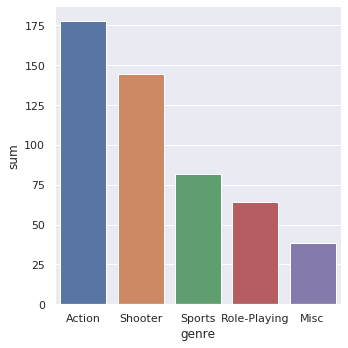


Выбор пользователей Европы
           genre     sum
0         Action  159.34
8        Shooter  113.47
10        Sports   69.09
7   Role-Playing   48.53
6         Racing   27.29


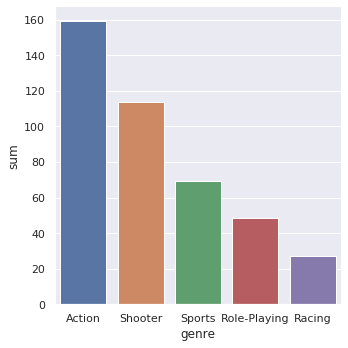


Выбор пользователей Японии
          genre    sum
7  Role-Playing  65.44
0        Action  52.80
3          Misc  12.86
9    Simulation  10.41
2      Fighting   9.44


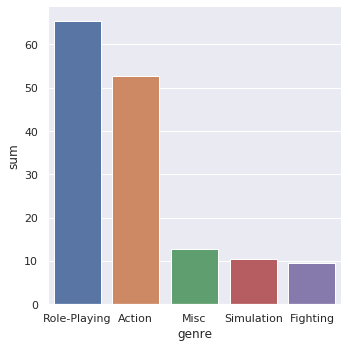

In [40]:
# получим тор5 жанров по регионам
regions = ['na_sales','eu_sales', 'jp_sales']
country = ['Северной Америки', 'Европы', 'Японии']
i = 0
for reg in regions:
    try:
        data_region = data_actual.pivot_table(index = ['genre'], values = [reg], aggfunc = ['sum']).reset_index()
        data_region.columns = ['genre','sum']
        print('Выбор пользователей', country[i]) 
        y = data_region.sort_values(by = 'sum', ascending = False).head(5)
        print(y)
        sns.catplot(data = y, x='genre', y='sum', kind = 'bar')
        plt.show()
        i += 1
        print()
    except:
        print('проверяй не получилось')

### по полученым данным о top5 жанров наиболее популярным по регионам можно заметить, что предпочтения пользователей из Северной Америки и Европы практически совпадают за исключением пятой строки, а в тоже время выбор пользователей Японии значительно отличается как по составу так и по расположению в порядке уровня продаж. Также рынок Японии значительно меньше рынков других регионов и вследствии этого уровень продаж там ниже.

### Расмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе?

Выбор пользователей Северной Америки
      rating     sum
2          M  231.57
0          E  114.37
4  no_rating  103.31
1       E10+   75.70
3          T   66.02


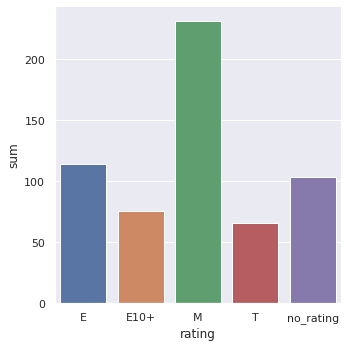


Выбор пользователей Европы
      rating     sum
2          M  193.96
0          E  113.03
4  no_rating   91.50
1       E10+   55.37
3          T   52.96


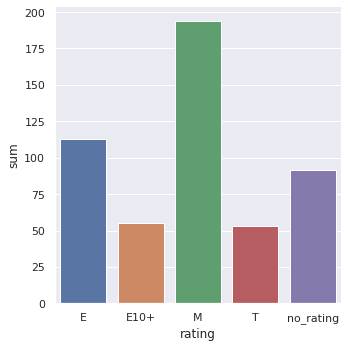


Выбор пользователей Японии
      rating     sum
4  no_rating  108.84
0          E   28.33
3          T   26.02
2          M   21.20
1       E10+    8.19


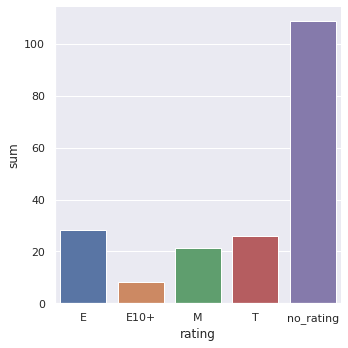

In [41]:
regions = ['na_sales','eu_sales', 'jp_sales']
country = ['Северной Америки', 'Европы', 'Японии']
i = 0
for reg in regions:
    try:
        data_region = data_actual.pivot_table(index = ['rating'], values = [reg], aggfunc = ['sum']).reset_index()
        data_region.columns = ['rating','sum']
        print('Выбор пользователей', country[i])
        print(data_region.sort_values(by = 'sum', ascending = False))
        sns.catplot(data = data_region, x='rating', y='sum', kind = 'bar')
        plt.show()
        i += 1
        print()
    except:
        print('проверяй не получилось')

### Согласно рейтинга  ESRB играм могут присваиватся следующие значения: «E» — «Для всех» «E10+» — «Для всех от 10 лет и старше»  «T» — «Подросткам» «M» — «Для взрослых». Если расматривать без учета позиции "нет рейтинга" то на рынках Северной Америки и Европы наибольшее предпочтение получают игры с рейтингом М, затем Е, в конце списка игры для детей и подросков. На рынке Японии наибольшее предпочтение отдано рейтингу Е, затем Т, а замыкает список игры для взрослых и детей. В приведенных данных вновь заметно отличие рынка Японии от других регионов.

### Шаг 5. Проверка гипотез

### Сформулируем нулевую гипотезу как то, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативной гипотезой установим неравенство средних пользовательских рейтингов. Пороговое значение alpha примем равным 5%. Так как выборки средних независимы применим метод st.ttest_ind.

In [42]:
# функция для расчета доверительного интервала
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h 

In [43]:
w = data_actual.query('platform == "XOne"')['user_score']
r = data_actual.query('platform == "PC"')['user_score']
alpha = 0.05
results = st.ttest_ind(w, r)
print('p-значение',results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print()
print('среднее значение оценок пользователей XOne с доверительными интервалами', mean_confidence_interval(w))
print('среднее значение оценок пользователей PC с доверительными интервалами', mean_confidence_interval(r))

p-значение 0.23116053376975176
Не получилось отвергнуть нулевую гипотезу

среднее значение оценок пользователей XOne с доверительными интервалами (6.746963562753036, 6.5855813818179, 6.908345743688172)
среднее значение оценок пользователей PC с доверительными интервалами (6.5922, 6.396114778324609, 6.788285221675391)


### Сформулируем нулевую гипотезу как то, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта»)  одинаковые. Альтернативной гипотезой установим неравенство средних пользовательских рейтингов. Пороговое значение alpha примем равным 5%. Так как выборки средних независимы применим метод st.ttest_ind.

In [45]:
w = data_actual.query('genre == "Action"')['user_score']
r = data_actual.query('genre == "Sports"')['user_score']
alpha = 0.05
results = st.ttest_ind(w, r)
print('p-значение',results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print()
print('среднее значение оценок пользователей Action с доверительными интервалами', mean_confidence_interval(w))
print('среднее значение оценок пользователей Sports с доверительными интервалами', mean_confidence_interval(r))

p-значение 2.517905981866881e-50
Отвергаем нулевую гипотезу

среднее значение оценок пользователей Action с доверительными интервалами (7.0923132880698345, 7.02627223627571, 7.158354339863959)
среднее значение оценок пользователей Sports с доверительными интервалами (5.766138059701493, 5.558622743165421, 5.973653376237565)


### Шаг 6. Общий вывод

### В представленом анализе расмотренны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Необходимо было выявить определяющие успешность игры закономерности. Были рассмотренны данные за период с 1980 по 2016 годы. На основании расмотренных данных можно сделать вывод, что характерный срок за который появляется и исчезает игоровая платформа составляет около 10 лет. Для дальнейшего анализа были взяты  данные с 2012 года, т.к. в период с 1980 по 2008 годы наблюдался ежегодный рост количества проданных игр, а в период с 2009 по 2011 годы наблюдался резкий спад. С 2012 года по 2016 наблюдается относительно равномерное распределение количества продаж игр по годам без резких изменений показателей. Рассматривая показатели продаж за период с 2012 по 2016 годы можно заметить, что выбор игровых платформ ограничен 11 видами. Приэтом в основновном происходит спад объемов продаж за исключением PS4 и XOne которые без учета 2016 года (возможно не полные данные) показывают положительную динамику продаж. При рассмотрении одной из популярных платформ PS4 по диаграмме рассеивания можно заметить, что с увеличением оценки увеличивается уровень продаж. Однако по рассеяванию можно предположить, что в большей степени на продажи влияют оценки критиков, а значимость оценки пользователей ниже. Потвердив это предположание посчитав коэфициент корреляции. По расчитаным коэфициентам корреляции видно, что прослеживается зависимость уровня продаж от оценки игр критиками, а влияние оценок пользователей кране мало и имеет отрицательный характер. Такой характер взаимосвязи показателей связан вероятно с тем, что критики более объективно проводят оценку игр, а пользователи зачастую выставляют оценку в случае негативного восприятия продукта. Рассматривая диаграмму рассеивания и коэффициенты корреляции других платформ можно заметить, что в основном распределение показателей имеют схожий характенр с платформой PS4 за исключением WiiU и DS имеющих обратное распределение. По распределению игр по жанрам можно заметить, что наиболее прибыльные жанры это Action и Shooter, прибыль 441,12 и 304,73 соответствено, а наименее прибыльные это игры основанные на спокойном сюжете такие как Puzzle, Strategy. На этом замечании можно сделать вывод, что пользователям нравятся игры с более активным сюжетом. По полученым данным видно, что выбор игровых платформ у пользователей Северной Америки и Европы совподает по наименованию платформ, однако в рейтинге продаж занимают различные позиции. Так лидер Северо Американского рынка Х360 с объемом продаж 140,05 в Европе занимает лишь третью позицию с суммой 74,52 и обратная ситуация с лидером Европы PS4 - 141.09 в Северной Америке на второй позиции - 108,74. В случае с Японией ситуация разительно отличается как по представленным платформам, так и по расположению согласно объемам продаж. Первую позицию занимает 3DS которая на рынках Северной Америки и Европы находится на 5 позиции. Вместо X360 и XOne представленны PSV и WiiU. Также по полученым данным о top5 жанров наиболее популярным по регионам можно заметить, что предпочтения пользователей из Северной Америки и Европы практически совпадают за исключением пятой строки, а в тоже время выбор пользователей Японии значительно отличается как по составу так и по расположению в порядке уровня продаж. Также рынок Японии значительно меньше рынков других регионов и вследствии этого уровень продаж там ниже. Согласно рейтинга ESRB играм могут присваиватся следующие значения: «E» — «Для всех» «E10+» — «Для всех от 10 лет и старше» «T» — «Подросткам» «M» — «Для взрослых». Если расматривать без учета позиции "нет рейтинга" то на рынках Северной Америки и Европы наибольшее предпочтение получают игры с рейтингом М, затем Е, в конце списка игры для детей и подросков. На рынке Японии наибольшее предпочтение отдано рейтингу Е, затем Т, а замыкает список игры для взрослых и детей. В приведенных данных вновь заметно отличие рынка Японии от других регионов. В ходе иследования были проверены следующие гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые и Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные. Были проведены следующие дествия: Сформулируем нулевую гипотезу как то, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативной гипотезой установим неравенство средних пользовательских рейтингов. Пороговое значение alpha примем равным 5%. Так как выборки средних независимы применим метод st.ttest_ind. Нулевая гипотеза не была отвергнута и второе: Сформулируем нулевую гипотезу как то, что средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта»)  одинаковые. Альтернативной гипотезой установим неравенство средних пользовательских рейтингов. Пороговое значение alpha примем равным 5%. Так как выборки средних независимы применим метод st.ttest_ind. Нулевая гипотеза была отклонена. 